Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [54]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [55]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [56]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

In [81]:
df['high_speed_internet'].value_counts()

0    44561
1     4257
Name: high_speed_internet, dtype: int64

In [116]:
#Data Wrangling
import numpy as np

def wrangle(data):
  df = pd.read_csv(data,
                   parse_dates=['created'],
                   index_col ='created')
  
  df = df[['bedrooms','cats_allowed', 'dogs_allowed', 'price','interest_level', 'bathrooms', 'laundry_in_unit']]

  return df


In [117]:
df = wrangle(DATA_PATH+'apartments/renthop-nyc.csv')

df.head()

,bedrooms,cats_allowed,dogs_allowed,price,interest_level,bathrooms,laundry_in_unit
created,,,,,,,
2016-06-24 07:54:24,3,0,0,3000,medium,1.5,0
2016-06-12 12:19:27,2,1,1,5465,low,1.0,0
2016-04-17 03:26:41,1,0,0,2850,high,1.0,0
2016-04-18 02:22:02,1,0,0,3275,low,1.0,0
2016-04-28 01:32:41,4,0,0,3350,low,1.0,0


In [122]:
#Splitting the data
#Trying to figure out correlation between bedrooms and total price


X = df[['bedrooms']]

y = df['price']

In [123]:
#Establishing Baseline

from sklearn.metrics import mean_absolute_error

print('Mean apartment rent:', y.mean())
y_pred = [y.mean()] * len(y)
print('Baseline Mean absolute error:', mean_absolute_error(y, y_pred))

Mean apartment rent: 3830.174035500081
Baseline Mean absolute error: 1549.6424487275


In [124]:
#Building the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

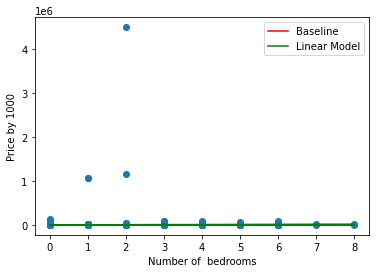

In [125]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, y_pred, label='Baseline', color='red')
plt.plot(X, model.predict(X), label='Linear Model', color='green')
plt.xlabel('Number of  bedrooms')
plt.ylabel('Price by 1000');
plt.legend();

In [126]:
print('Baseline MAE:', mean_absolute_error(y, y_pred))
print('Training MAE:', mean_absolute_error(y, model.predict(X)))

#MAE of model is performing better than baseline which is good. but almost similar

Baseline MAE: 1549.6424487275
Training MAE: 1306.2964665452675


In [127]:
#Back to splitting to give model more features

X2 = df[['bedrooms','cats_allowed', 'dogs_allowed', 'bathrooms', 'laundry_in_unit']]

model.fit(X2,y)

#MAE of model with added features
print('Training MAE2:', mean_absolute_error(y, model.predict(X2)))

Training MAE2: 1107.3210662434592
